In [ ]:
%matplotlib inline

#imports
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import csv

In [ ]:
# download the data file
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1c0JAPxRLg9WzreUFzSYDqc2oHMK-AcPF' -O 'data.csv'

Linear Regression is an AI algorithm used for predicting one continuous variable from another. But what is a continuous variable? A continuous variable is one that can take on any range of values. For example, if we wanted to store the amount of rain that fell on a day, we might get values of 0mm, 0.1mm, 2.9m or 3.7563792mm. On the other hand, if we wanted a variable to store the day of the week there would only be 7 possible values the variable could take on making it a categorical variable.

So how do we predict one variable from another? We can use some mathematical constructs that we already know. We'll use the familiar concept of a function of the form, $y=f(x)=mx+c$, which you may recognise is the equation of a line. In our function, $x$ is the variable we know, or the 'feature' of the data and $y$ is the variable we are trying to predict, or 'target' using our $model$, $f(x)$.

A simple problem solvable by linear regression is shown below, where the feature is 'hours slept' and the target to be predicted by the model is 'grumpiness'. Looking at the data we see that the points are scattered around a line. If we can figure out the equation for the line, we can use it as a model to make predictions.

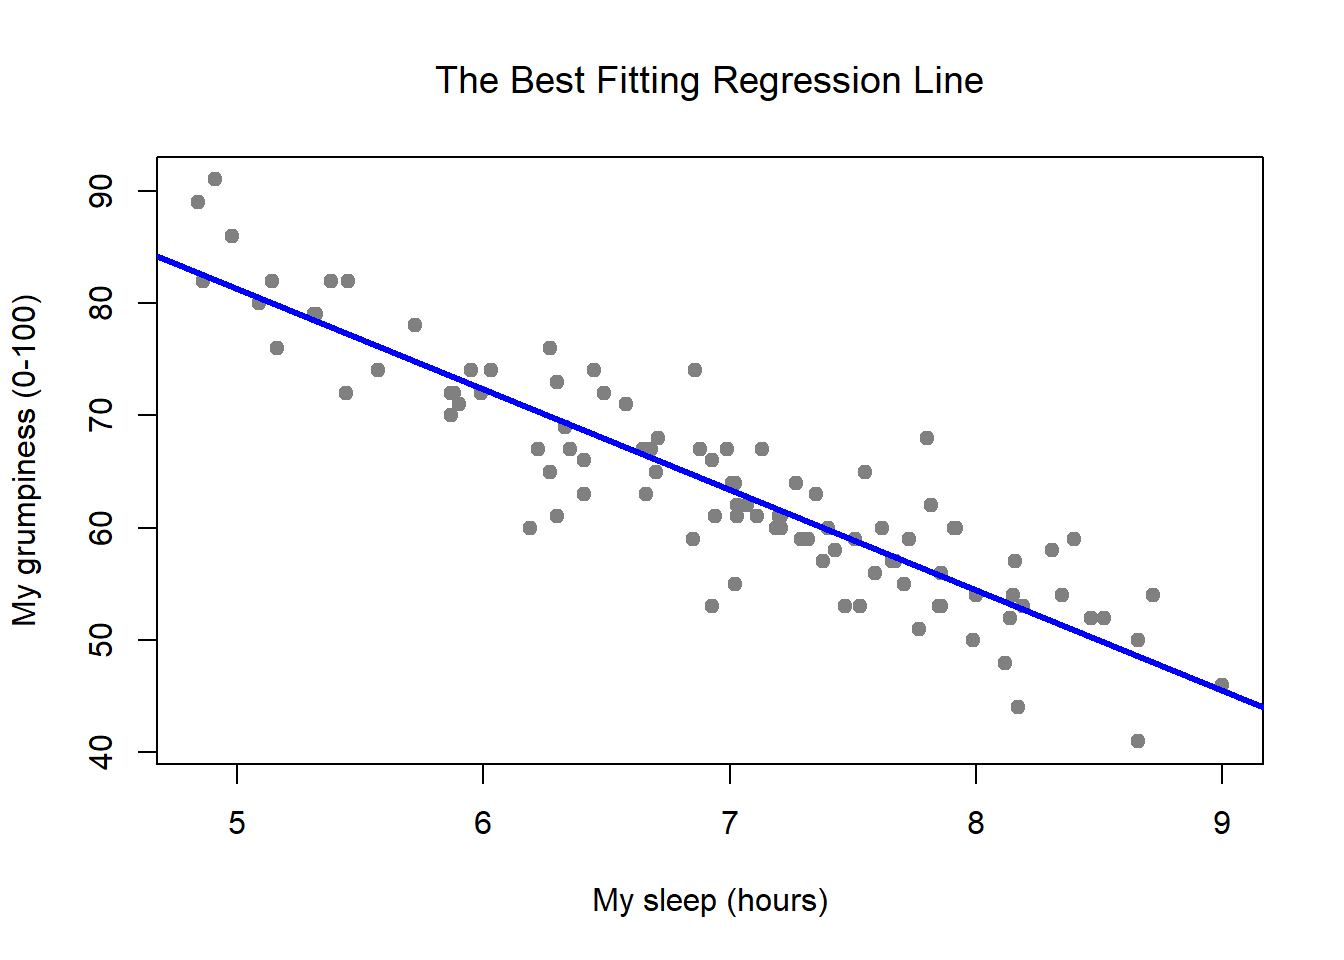

To figure out how to find the parameters of the model we'll look at a problem where we try and predict test scores according to the amount of hours studied.

The particular model that we looked at is parameterised by two variables $m$ and $c$. To come up with a model that accurately predicts test scores from hours studied we need to figure out what the values for these parameters are going to be.

For this, we need a dataset which contains data someone might have collected from a number of students. The dataset would contain data points for every student with the amount of hours they studied $(x)$ and their test score $(y)$. 

To explore the dataset, we'll load in the data and check how many data points we have in our dataset. Also, we'll display the first 10 points in the dataset to check if we can observe any relationship between the feature and the target.

Before you run the next code block, what do you expect to see in the data? Would you expect the test scores $(y)$ to be lower for a higher amount of hours studied $(x)$, or the other way around?

In [ ]:
# This code block loads the dataset into our program and displays some datapoints
# You don't need to worry about how it works
PATH = 'data.csv'

points = genfromtxt(PATH, delimiter=',')

#Extract columns
x = np.array(points[:,0])
y = np.array(points[:,1])

print('Number of data points: ', x.shape[0])

print("Data Point Number,   Num of Hours Studied (x),     Test Scores (y)")

for i in range(10):
  print( str(i) + ":                            " + str(round(x[i], 2)) + "                     " + str(round(y[i], 2)) )

So it looks like we have a fairly small dataset of 100 points. Also a higher amount of hours studied lead to higher test scores in the 10 data points we looked at! But what about the rest of the 90 points. Instead of printing them on the screen let's plot the data on a graph.

In [ ]:
# Plot the dataset on a graph using the Matplotlib third-party package
# You don't need to worry about how this works
fig1  = plt.figure()
ax1   = fig1.gca()

fig1.set_size_inches(15, 10)

ax1.scatter(x, y, label='Data Points')
ax1.set_xlabel('Hours of study')
ax1.set_ylabel('Test scores')
ax1.set_title('Dataset')
ax1.legend()

plt.show()

So looking the plot we can identify that there is a positive correlation between the amount of hours studied and test scores.

Coming back to our model, $y=mx+c$, we wanted to figure out some values for $m$ and $c$ such that when we substitute an $x$ for the amount of hours studied, our model will predict a test score $y$. Before we do try and learn the $m$ and $c$ parameters let's try to work out some rough values by hit and trial which are able to make accurate predictions close to the actual values in the dataset.

You might notice that our model is simply the equation of a line with $m$ being the gradient of the line and $c$ the y-intercept. Try some values to draw a line that passes through the data points in the code segment below. We'll start with a random guess of $m=0.5$ and $c=0$.

To make the graph a little easier to see, we'll use only the first 10 points of the data and come back to using the entire dataset later.

### Exercise 1

1.   Fill in the 'predict' function so that it implements the mathematical function, $y=mx+c$

2.   Try changing the values of $m$ and $c$ and re-running the code block till the line is reasonably close to passing through the data. The graph is displayed when you run this code block.

In [ ]:
# Exercise: Try changing the values for m and c below so that the line passes through the data
m = 0.5
c = 0

num_points = 10

# Exercise: Fill in this function to implement y=mx+c and return the y variable
def predict(x, m, c):
  # Insert your code here and comment the line below by adding a '#' symbol at the start of the line. Or you could also, just delete it!
  raise NotImplementedError

# NO CHANGES REQUIRED BELOW

# This function plots the line and the data points on the graph, no need to change anything in here
def plot_line_and_data(x, y, m, c):
  x_line  = np.linspace(20, 80, 100)
  y_line  = predict(x_line, m, c)

  # Values to try and predict
  x_vals = x[:num_points]
  x_vals = np.array(x_vals)

  y_vals  = predict(x_vals, m, c)

  # Plot the dataset
  fig2  = plt.figure()
  ax2   = fig2.gca()

  fig2.set_size_inches(15, 10)

  ax2.plot( x_line, y_line, color='r', label='Predictions Line' )
  ax2.scatter( x_vals, y_vals, color='g', marker='x', s=200, label='Predicted Points' )
  ax2.scatter( x[:num_points], y[:num_points], s=200, label='Data Points' )
  ax2.set_xlabel('Hours of study')
  ax2.set_ylabel('Test scores')
  ax2.legend()

  plt.show( )

plot_line_and_data(x, y, m, c)

So we were able to figure out some rough values for our parameters such that our models predictions were close to the actual values. You might have found this difficult to do visually.

In practice, we try to minimise a loss function or error function to get accurate values for our parameters. For linear regression, we use a function called the mean square error loss given below.

Mean Squared Error, $ l = \frac{1}{N} \sum^N_{i=0} [\hat{y}_i - y_i]^2 = \frac{1}{N} \sum^N_{i=0} [(m*x_i+c) - y_i] ^2$

While this may look complicated the equation is actually quite simple. The MSE function uses the model to predict the targets $(y_i)$ for every point $(x_i)$ in the dataset. It then measures the difference between the prediction $(\hat y_i)$ and the target $(y_i)$ and squares it to get a measurement of the error between the predictions and the true targets. Finally, it sums up the error for all the $N$ points in the dataset before taking an average.

### Exercise 2


1.   Fill in the 'mse_loss' function below to implement the mathematical function shown above and return the loss
2.   Try different values of $m$ and $c$ to minimise the MSE loss as much as you can. The MSE loss is displayed when you run the code block



In [ ]:
# Exercise: Try changing the values for m and c below to get the MSE loss as low as you can
m = 0.5
c = 0

# Exercise: Fill in this function to calculate and return the mean squared error loss as shown in the function above
def mse_loss(y_pred, y):
  # Insert your code here and comment the line below by adding a '#' symbol at the start of the line. Or you could also, just delete it!
  raise NotImplementedError

# NO CHANGES REQUIRED BELOW

# This function plots the line, data and error, This doesn't need to be changed
def plot_line_and_data_and_error(x, y, m, c):
  x_line  = np.linspace(20, 80, 100)
  y_line  = predict(x_line, m, c)

  # Values to try and predict, try adding some more values to the list of numbers below!
  x_vals = x[:num_points]
  x_vals = np.array(x_vals)

  y_vals  = predict(x_vals, m, c)

  # Plot the dataset
  fig3  = plt.figure()
  ax3   = fig3.gca()

  fig3.set_size_inches(15, 10)

  ax3.plot( x_line, y_line, color='r', label='Predictions Line' )
  for i in range(num_points):
    if i == 0:
      ax3.plot( np.repeat(x_vals[i], 2), (y[i], y_vals[i]), ls='--', color='b', label='Error' )
    ax3.plot( np.repeat(x_vals[i], 2), (y[i], y_vals[i]), color='b', ls='--' )
  ax3.scatter( x_vals, y_vals, color='g', marker='x', s=200, label='Predicted Points' )
  ax3.scatter( x[:num_points], y[:num_points], s=200, label='Data Points' )
  ax3.set_xlabel('Hours of study')
  ax3.set_ylabel('Test scores')
  ax3.legend()

  plt.show( )

  loss = mse_loss(y_vals, y[:num_points])
  print("\n\nMSE Loss: ", loss )

plot_line_and_data_and_error(x, y, m, c)

At this point we've managed to minimise our MSE loss function by adjusting our models parameters through hit and trial. We'll now look at an AI algorithm that is able to learn these parameters automatically by looking at the dataset and iteratively correcting itself till it is able to achieve the minimal loss.

The specific algorithm we'll look at is the Gradient Descent Algorithm that you studied in the lecture earlier today.

Recall that the Gradient Descent algorithm is used to work out the values of our model parameters, $m$ and $c$ in this case, which minimise the loss function. 

By starting with an initial guess for the parameters we take small steps in the direction of the negative gradient as shown below in the gradient descent update equations to get a better estimate of the parameters.


$$m_{i+1} = m_i - \gamma \frac{dl}{dm}$$

$$c_{i+1} = c_i - \gamma \frac{dl}{dc}$$

where,

$$ l = \frac{1}{N} \sum^N_{i=0} [\hat{y}_i - y_i]^2 = \frac{1}{N} \sum^N_{i=0} [(m*x_i+c) - y_i]^2 $$  is the MSE loss and $\gamma$ is the learning rate.


Notice that the above equations require finding and coding the partial derivatives, $\frac{dl}{dm}$ and $\frac{dl}{dc}$. Using some basic calculus, we can compute the derivative w.r.t '$m$' as shown below


$$ \frac{dl}{dm} = \frac{d}{dm} \{ \frac{1}{N} \sum^N_{i=0} [(mx_i+c) - y_i]^2\}$$

$$ \frac{dl}{dm} = \frac{1}{N} \sum^N_{i=0} 2x_i * [ (mx_i+c) - y_i ] $$

$$ \frac{dl}{dm} = \frac{2}{N} \sum^N_{i=0} [ x_i * [ (mx_i+c) - y_i ] ] $$


Similarly, the derivative w.r.t '$c$' can be calculated as 


$$ \frac{dl}{dc} = \frac{2}{N} \sum^n_{i=0} [ [ (mx_i+c) - y_i ] ] $$

Code these derivatives in the functions below and observe how the value of the MSE changes with every update made to the parameters. Use the given values of 10 and 0.0001 for the number of iterations and learning rate.


### Exercise 3


1.   Fill in the function 'm_grad' to compute and return the derivative of the MSE loss w.r.t $m$
2.   Fill in the function 'c_grad' to compute and return the derivative of the MSE loss w.r.t $c$
3.   Write code in the 'grad_descent_line' function to calculate the gradients from the 'm_grad' and 'c_grad' functions and store them in variables.
4.   Write code in the 'grad_descent_line' function to implement the gradient descent update equations and update the values of $m$ and $c$ for the next iteration





In [ ]:
num_iters     = 10
learning_rate = 0.0001

m = 0.5
c = 0

# Exercise: Fill in the function 'm_grad' to compute and return the derivative of the MSE loss w.r.t m
def m_grad(x, m, c, y):
  # Insert your code here and comment the line below by adding a '#' symbol at the start of the line. Or you could also, just delete it!
  raise NotImplementedError

# Exercise: Fill in the function 'm_grad' to compute and return the derivative of the MSE loss w.r.t c
def c_grad(x, m, c, y):
  # Insert your code here and comment the line below by adding a '#' symbol at the start of the line. Or you could also, just delete it!
  raise NotImplementedError

def grad_descent_line(x, y, m, c):

  loss_hist = []

  fig3  = plt.figure()
  ax3   = fig3.gca()

  fig3.set_size_inches(15, 10)

  ax3.scatter( x, y, s=50, label='Data Points' )

  for i in range(num_iters):

    y_vals  = predict( x, m, c )

    loss    = mse_loss(y_vals, y)
    loss_hist.append(loss)

    print( "Iteration " + str(i) + " MSE Loss: " + str(round(loss, 4)) + "  (m, c): (" + str(round(m, 2)) + ", " + str(round(c, 2)) + ")" )

    num_lines_draw = 3

    if (i % (num_iters//num_lines_draw)) == 0:
      x_line  = np.linspace(20, 80, 100)
      y_line  = predict(x_line, m, c)
      ax3.plot( x_line, y_line, color='r', alpha = (i+1)/num_iters, label='Iteration '+str(i) )

    # Exercise: Insert code here to calculate the gradients w.r.t 'm' and 'c' and store them in variables
    # Exercise: Use the gradient descent update equation to update the values of the gradients
    raise NotImplementedError

  ax3.set_xlabel('Hours of study')
  ax3.set_ylabel('Test scores')
  ax3.legend()

  fig4  = plt.figure()
  ax4   = fig4.gca()

  fig4.set_size_inches(15, 10)
  ax4.plot(loss_hist, label='MSE Loss')
  ax4.set_ylabel('MSE Loss')
  ax4.set_xlabel('Iterations')
  ax4.legend()

  plt.show( )

grad_descent_line(x, y, m, c)


Now that we've trained the model on the dataset and learned the parameters to minimise we can use it to make predictions for test scores based on the hours of study!